In [1]:
import main

folder_path = r"C:\Users\Daniel_Arcos\Downloads\Matanza  251"
result = main.detect_plots(folder_path)


<Axes: >

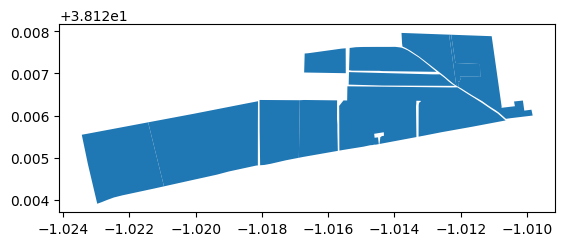

In [2]:
import geopandas as gpd
from shapely.geometry import shape, Point


properties = [x['properties'] for x in result]
geometries = [shape(x['geometry']) for x in result]

gdf = gpd.GeoDataFrame(properties,  geometry=geometries, crs="epsg:4326")

gdf.plot()

In [3]:
from pyproj import Transformer
positions = main.get_dataset_positions(folder_path)
tr = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
x, y = tr.transform(positions[0][0], positions[0][1])
tr_point = Point(x, y)


tr_gdf = gdf.to_crs(epsg=3857).buffer(5)
mask = tr_gdf.intersects(tr_point)
gdf[mask]['field'].unique()

array(['cabrera'], dtype=object)

In [ ]:
import main
folder_path = r"C:\Users\Daniel_Arcos\Downloads\Matanza  251"
main.detect_fields_and_divide(folder_path, r"C:\Users\Daniel_Arcos\Downloads\Matanza_out_2")




In [ ]:
import main
folder_path = r"C:\Users\Daniel_Arcos\Downloads\Matanza  251"
gdf =main.get_dataset_gdf(folder_path)
gdf.to_file(r"C:\Users\Daniel_Arcos\Downloads\Matanza_out.geojson", driver="GeoJSON")